<a href="https://colab.research.google.com/github/sujan9945587042/Machine-Learning/blob/main/RandomForestipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/census-income .csv')

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df['annual_income']

,annual_income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
32556,<=50K
32557,>50K
32558,<=50K
32559,<=50K


In [ ]:
df.shape

(32561, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
df.duplicated().sum()

np.int64(24)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

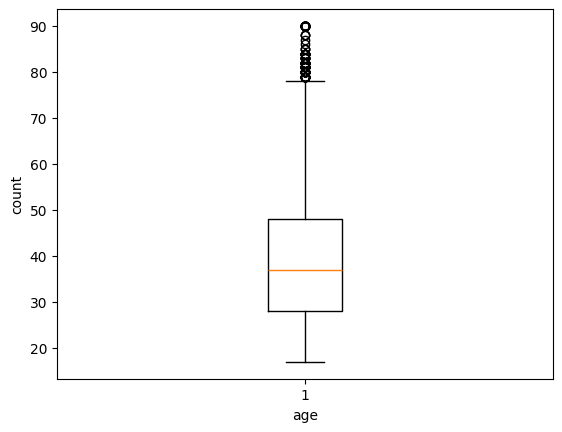

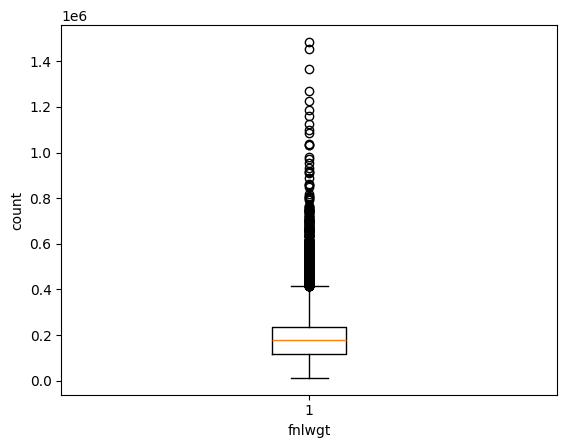

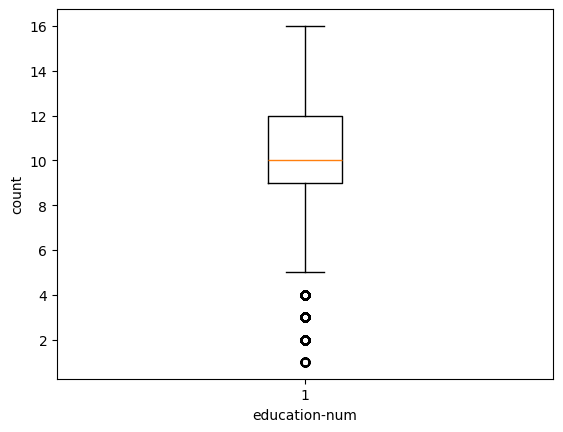

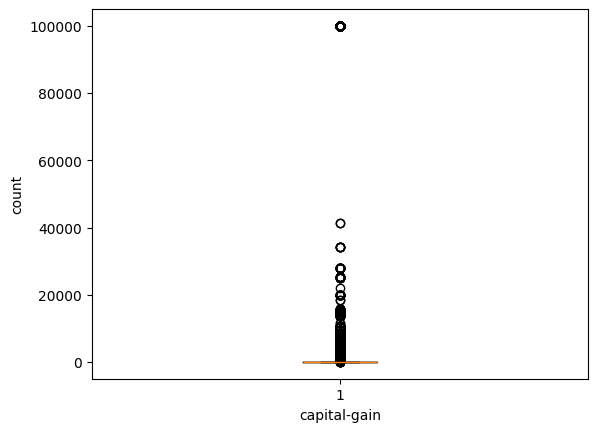

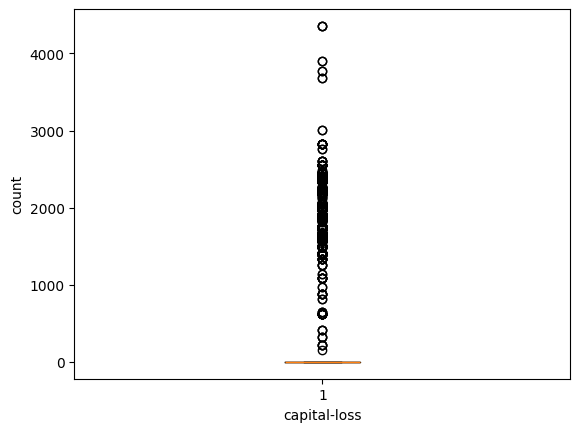

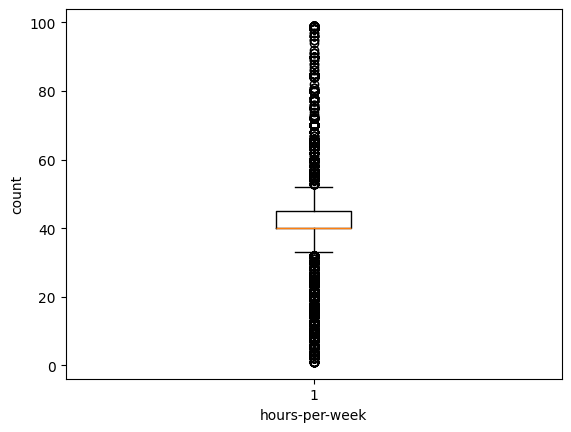

In [ ]:
for x in df.columns:
  if df[x].dtypes=='object':
    continue
  plt.boxplot(df[x])
  plt.xlabel(x)
  plt.ylabel("count")
  plt.show()

In [ ]:
# outliers={'age','fnlwgt','education-num','hours-per-week'}
# for x in outliers:
#   Q1=df[x].quantile(0.25)
#   Q3=df[x].quantile(0.75)
#   IQR=Q3-Q1
#   lower_bound=Q1-1.5*IQR
#   upper_bound=Q3+1.5*IQR
#   df=df[(df[x]<=lower_bound) & (df[x]>=upper_bound)]

In [ ]:
df['workclass']

,workclass
0,State-gov
1,Self-emp-not-inc
2,Private
3,Private
4,Private
...,...
32556,Private
32557,Private
32558,Private
32559,Private


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
for x in df.columns:
  if df[x].dtypes=='object':
    df[x]=le.fit_transform(df[x])

In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X=df.drop('annual_income',axis=1)

In [ ]:
Y=df['annual_income']

In [ ]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39


In [ ]:
Y

,annual_income
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,1
32558,0
32559,0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8,random_state=23)

In [ ]:
random_forest=RandomForestClassifier()

In [ ]:
random_forest.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=random_forest.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy=accuracy_score(y_pred,y_test)
accuracy*100

86.0940381069453

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
base_model=RandomForestClassifier(random_state=23)

In [ ]:
param_grid={
    'n_estimators':[100,200,300],
    'max_depth':[1,5,10],
    'min_samples_split':[2,5,7],
    'min_samples_leaf':[1,2,4],
    'criterion':['gini','entropy']
}

In [ ]:
grid_search=GridSearchCV(estimator=base_model,param_grid=param_grid)

In [ ]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=23),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 7],
                         'n_estimators': [100, 200, 300]})

In [ ]:
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
best_params = grid_search.best_params_
tuned_random_forest = RandomForestClassifier(**best_params, random_state=23)
tuned_random_forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200,
                       random_state=23)

In [ ]:
y_pred_tuned = tuned_random_forest.predict(x_test)
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
print(f"Accuracy of the tuned Random Forest model: {tuned_accuracy*100:.2f}%")

Accuracy of the tuned Random Forest model: 86.17%


Precision: 0.80
Recall: 0.57
F1-score: 0.67


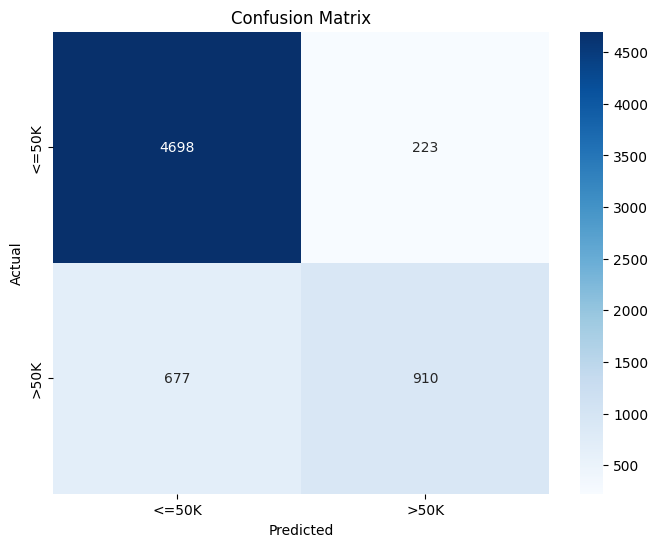

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

precision = precision_score(y_test, y_pred_tuned)
recall = recall_score(y_test, y_pred_tuned)
f1 = f1_score(y_test, y_pred_tuned)
conf_matrix = confusion_matrix(y_test, y_pred_tuned)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()